# Customer churn prediction - Final Project

## Loading libraries and data

In [4]:
#import libreries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#lode data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Understanding and Cleaning the data 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Its looks like we dont have mising values but some columns that are integers there dtype is object so lets change it

In [10]:
# change data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [11]:
# discribe data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Ok now we can see some mising data in the 'TotalCharges' column lets check it

In [20]:
# rows with missing data
print(df[df.isnull().any(axis=1)])
# how many rows with missing data
print(df[df.isnull().any(axis=1)].shape)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

We can see that we have 11 rows with missing data, 

And another thing we can see is that the 'tenure' is zero in this row so lets remove this rows

In [21]:
# remove rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [28]:
# check is we steall have rows with tenure = 0
print(df[df['tenure'] == 0])

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


The customer id dont give us information so lets remove it

In [22]:
# remove customerID column
df = df.drop('customerID', axis=1)

The senior citizen column is with the values of 0 and 1 lets chenge it to 'No' and 'Yes'

In [29]:
# change the senior citizen column to 'No' and 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# unike values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalC

In [39]:
# discribe data
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,5890,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


# EDA 

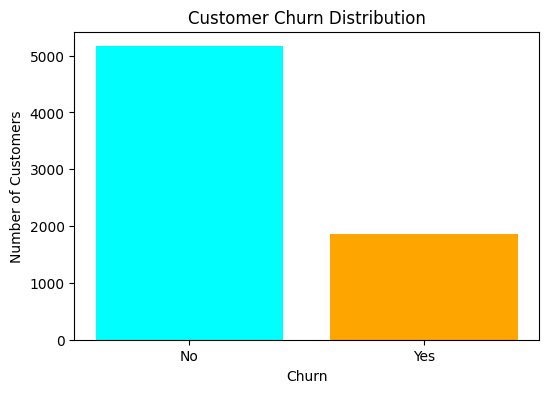

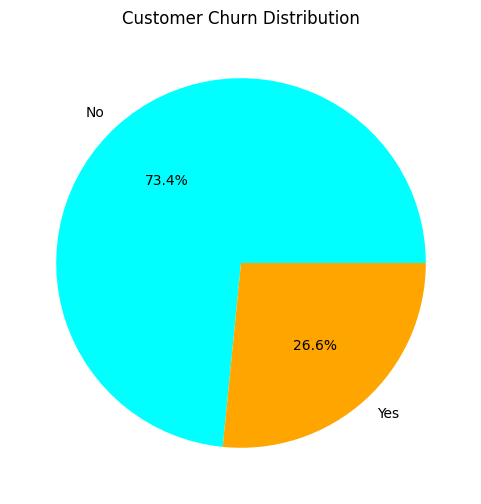

In [ ]:
# visual how many are churning vs not churning
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values, color=['cyan', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()

# pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['cyan', 'orange'])
plt.title('Customer Churn Distribution')
plt.show()

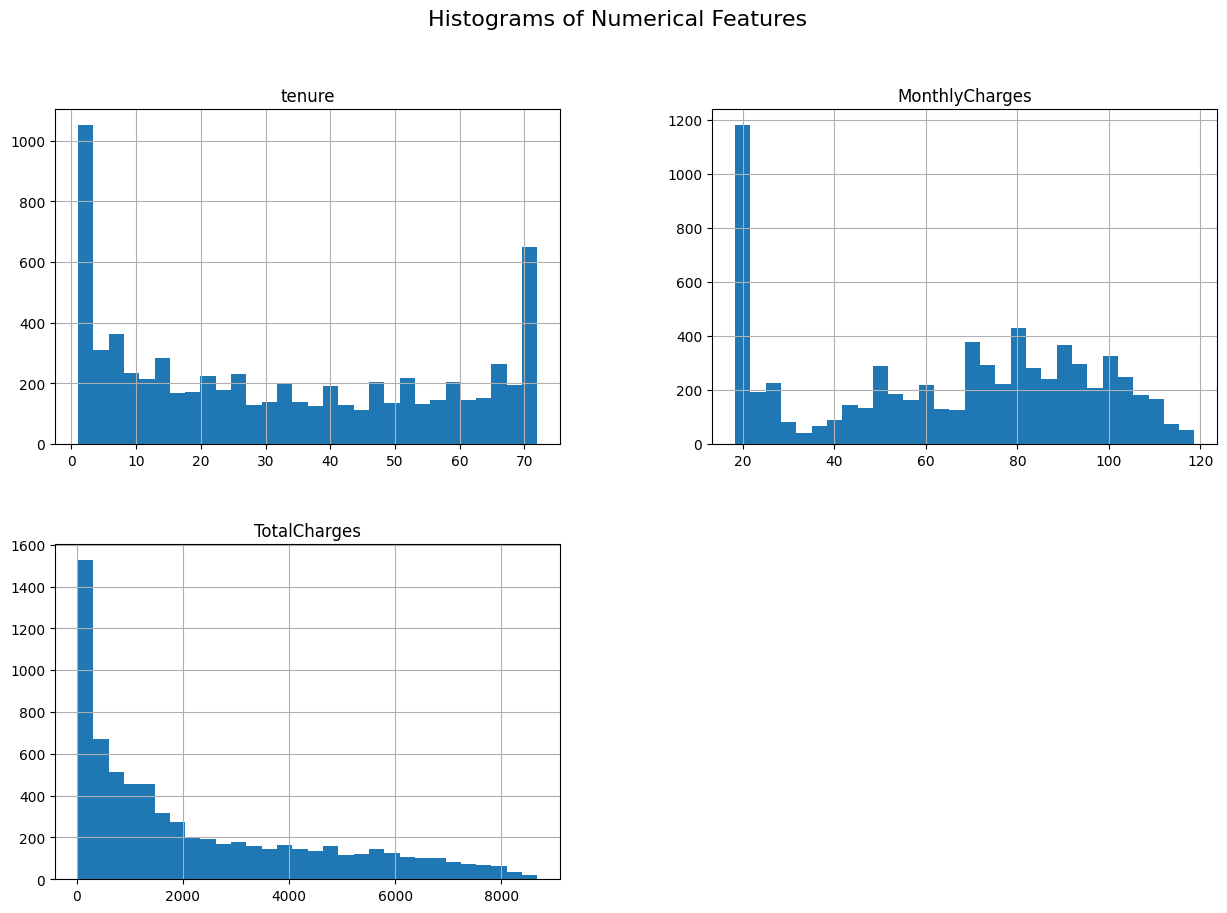

In [65]:
# fig of histogram of the data 
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

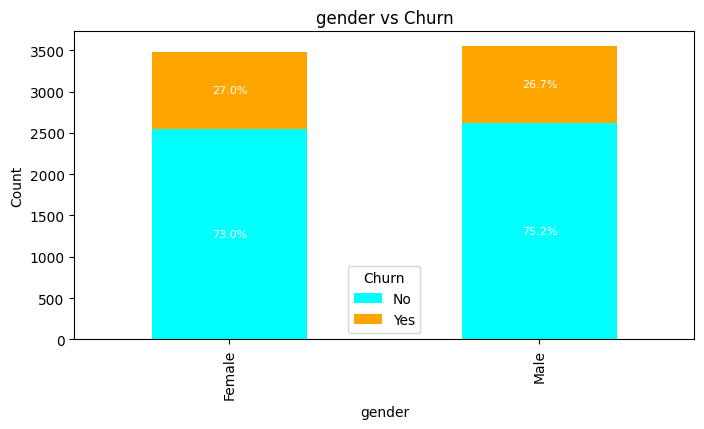

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

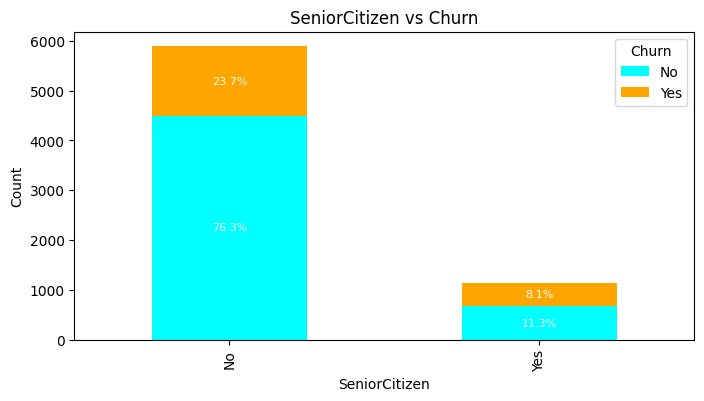

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

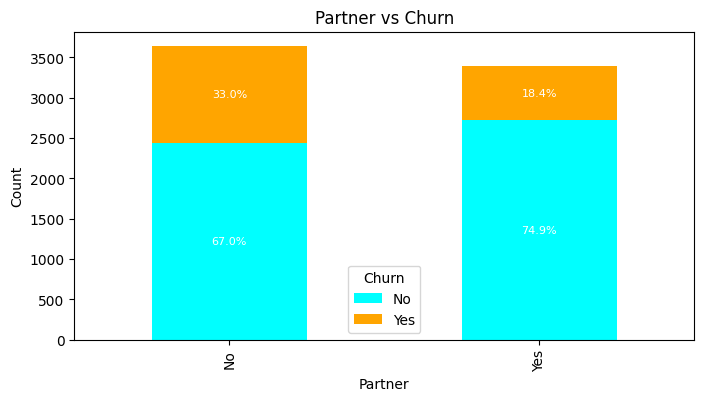

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

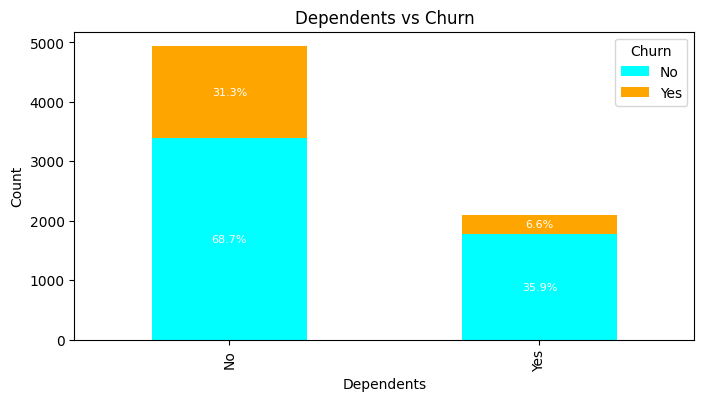

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

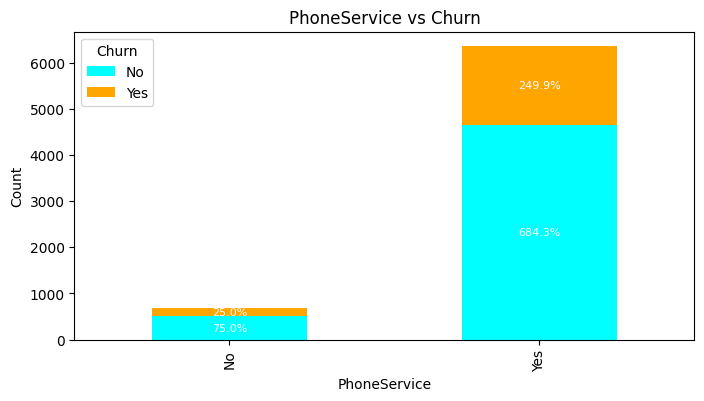

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

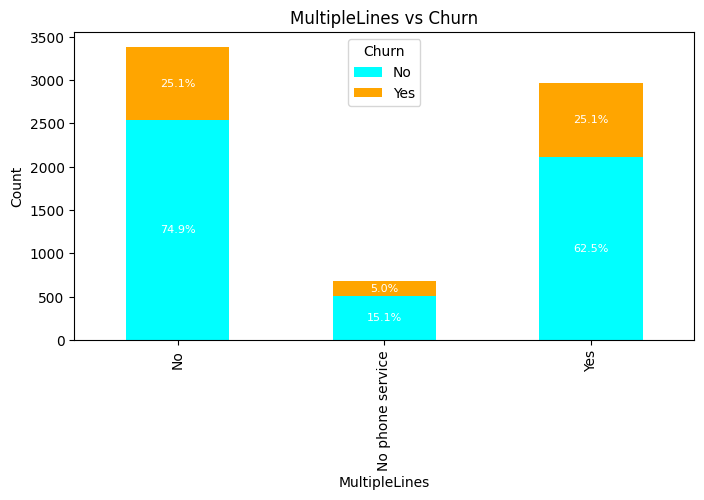

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

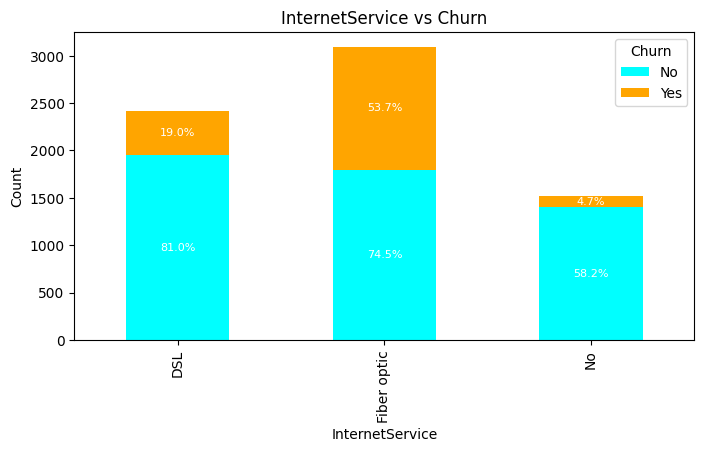

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

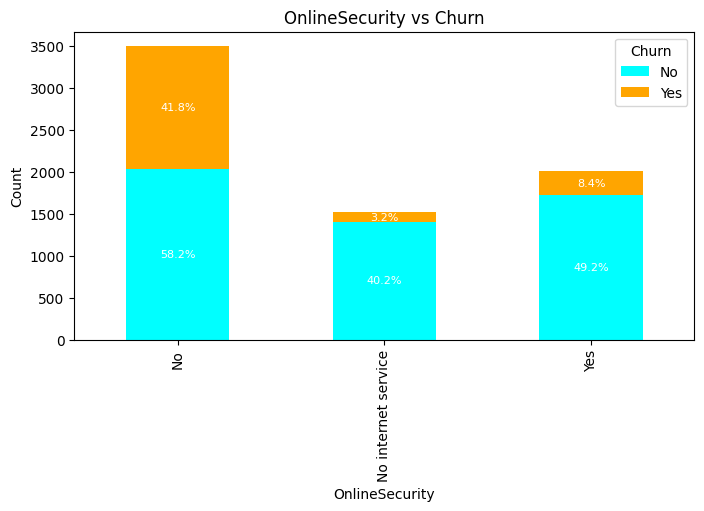

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

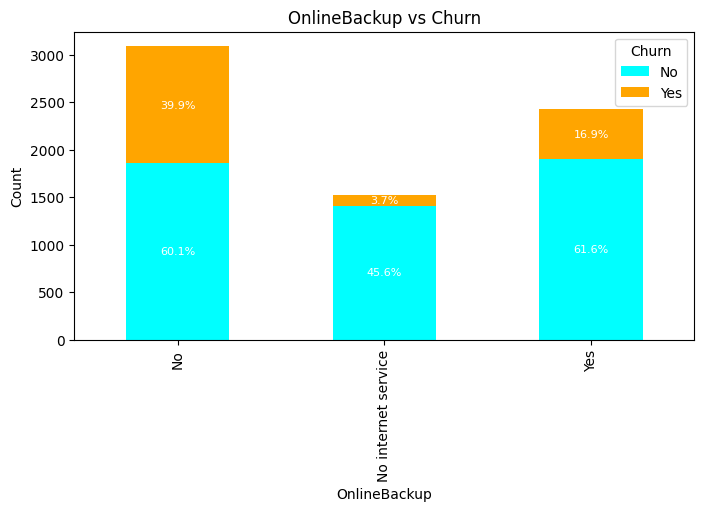

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

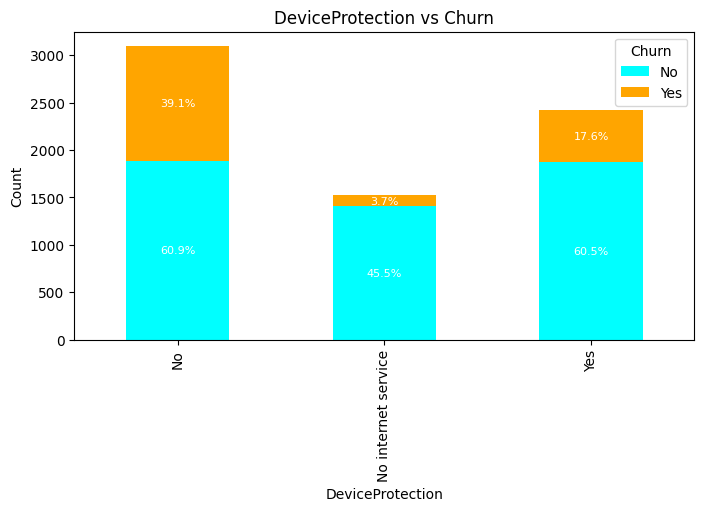

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

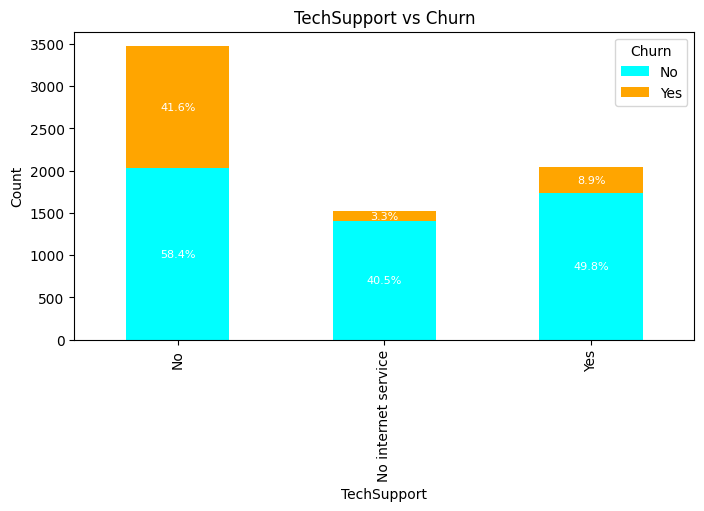

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

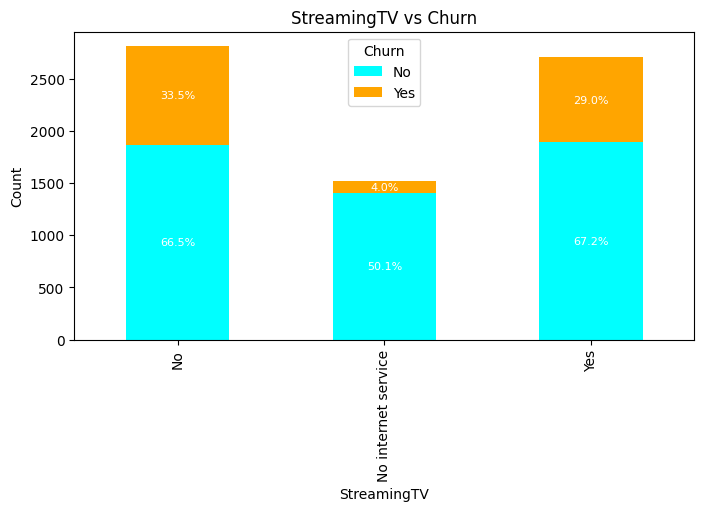

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

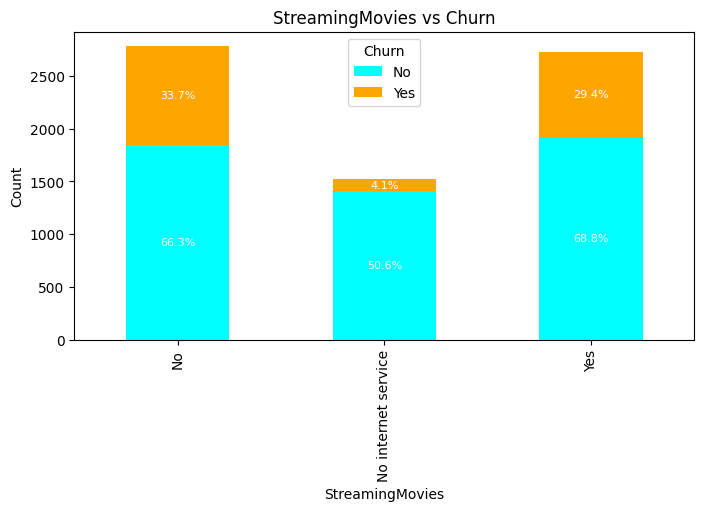

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

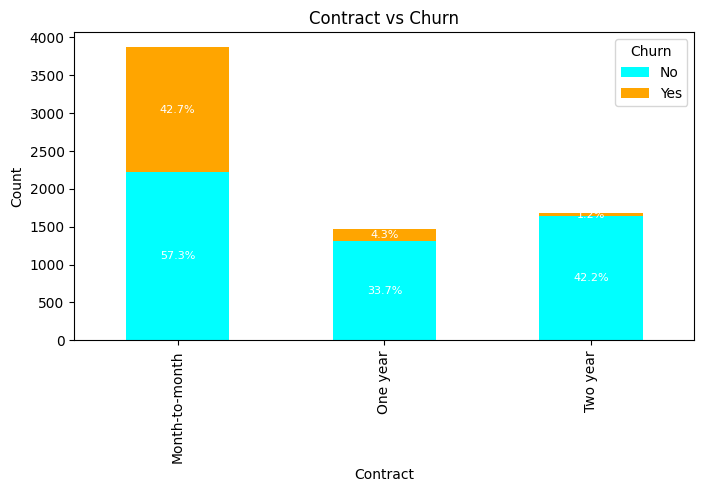

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

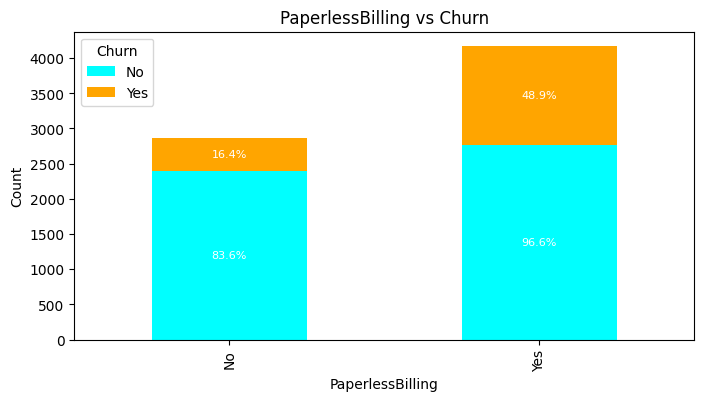

C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
C:\Users\itay\AppData\Local\Temp\ipykernel_16024\315114713.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

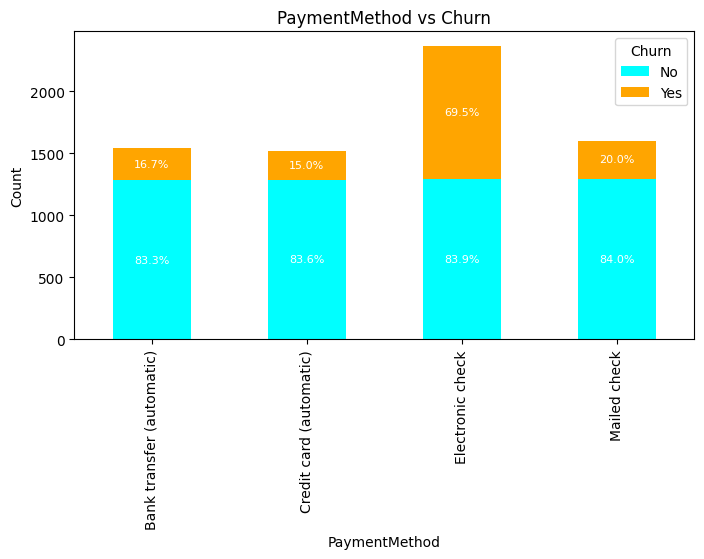

In [68]:
# Bar plots of each column vs churn with percentages
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column != 'Churn':
        plt.figure(figsize=(8, 4))
        churn_vs_column = df.groupby([column, 'Churn']).size().unstack()
        churn_vs_column.plot(kind='bar', stacked=True, color=['cyan', 'orange'], ax=plt.gca())
        
        # Add percentages on the bars
        for i, bar_group in enumerate(plt.gca().containers):
            for bar in bar_group:
                height = bar.get_height()
                total = churn_vs_column.sum(axis=1)[i // 2]  # Total for the category
                percentage = (height / total) * 100 if total > 0 else 0
                plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{percentage:.1f}%', 
                               ha='center', va='center', fontsize=8, color='white')
        
        plt.title(f'{column} vs Churn')
        plt.ylabel('Count')
        plt.xlabel(column)
        plt.legend(title='Churn', labels=['No', 'Yes'])
        plt.show()

In [ ]:
#